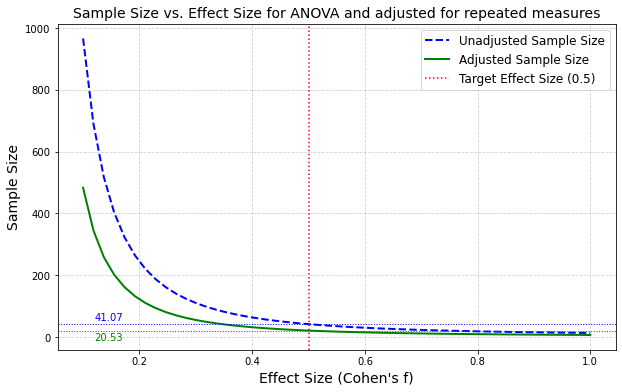

Improved plot saved as sample_size_plot.png with 500 DPI resolution.


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import FTestAnovaPower

# Parameters for the plot
effect_size = 0.5  # Medium effect size (Cohen's f)
alpha = 0.05       # Significance level
power = 0.8        # Desired power
k = 3              # Number of groups (3 AI systems)
rho = 0.5          # Intra-class correlation (assumed)
m = 3              # Number of repeated measures (flights per pilot)

# Calculate sample size for a range of effect sizes
effect_sizes = np.linspace(0.1, 1.0, 50)
anova_power = FTestAnovaPower()
sample_sizes = [anova_power.solve_power(effect_size=es, alpha=alpha, power=power, k_groups=k) for es in effect_sizes]

# Adjust for repeated measures
adjusted_sample_sizes = [n / (1 + (m - 1) * rho) for n in sample_sizes]

# Target effect size index
target_effect_size = effect_size
target_index = np.argmin(np.abs(effect_sizes - target_effect_size))

# Corresponding sample sizes for effect size = 0.5
y_unadjusted = sample_sizes[target_index]
y_adjusted = adjusted_sample_sizes[target_index]

# Improved Plot
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, label='Unadjusted Sample Size', linestyle='--', color='blue', linewidth=2)
plt.plot(effect_sizes, adjusted_sample_sizes, label='Adjusted Sample Size', linestyle='-', color='green', linewidth=2)
plt.axvline(x=effect_size, color='red', linestyle=':', label=f'Target Effect Size ({effect_size})', linewidth=1.5)
plt.axhline(y=y_unadjusted, color='blue', linestyle=':', linewidth=1)
plt.axhline(y=y_adjusted, color='green', linestyle=':', linewidth=1)

# Annotate key values
plt.text(effect_sizes[0] + 0.02, y_unadjusted + 5, f'{y_unadjusted:.2f}', color='blue', fontsize=10, verticalalignment='bottom')
plt.text(effect_sizes[0] + 0.02, y_adjusted - 5, f'{y_adjusted:.2f}', color='green', fontsize=10, verticalalignment='top')

# Enhance the axes
plt.xlabel('Effect Size (Cohen\'s f)', fontsize=14)
plt.ylabel('Sample Size', fontsize=14)
plt.title('Sample Size vs. Effect Size for ANOVA and adjusted for repeated measures', fontsize=14)

# Add grid and legend
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Save as high-resolution image
output_path = "sample_size_plot.png"
plt.savefig(output_path, dpi=500, bbox_inches='tight')
plt.show()

print(f"Improved plot saved as {output_path} with 500 DPI resolution.")